### Visualising ERA5 Data using Magics

This very fisrt exampke shows you how to download ERA5 Data fron the [Copernicus Climate Datastore](https://cds.climate.copernicus.eu/#!/home) 
using the [cdsapi](https://cds.climate.copernicus.eu/api-how-to), and use [Magics](https://confluence.ecmwf.int/display/MAGP/Magics) to visualise the result. 

In [4]:
import cdsapi

c = cdsapi.Client()
grib = "t1000.grib"

c.retrieve("reanalysis-era5-pressure-levels",
{
"variable": "temperature",
"pressure_level": "1000",
"product_type": "reanalysis",
"year": "2008",
"month": "01",
"day": "01",
"time": "12:00",
"format": "grib"
},
grib)

2019-02-17 15:05:01,097 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2019-02-17 15:05:01,229 INFO Request is completed
2019-02-17 15:05:01,231 INFO Downloading http://136.156.132.201/cache-compute-0004/cache/data1/adaptor.mars.internal-1550394827.9147217-10810-7-29cea448-89fa-40e8-b4e2-7a065c15fa47.grib to t1000.grib (2M)
2019-02-17 15:05:02,691 INFO Download rate 1.4M/s


Result(content_length=2076600,content_type=application/x-grib,location=http://136.156.132.201/cache-compute-0004/cache/data1/adaptor.mars.internal-1550394827.9147217-10810-7-29cea448-89fa-40e8-b4e2-7a065c15fa47.grib)

The data are now ready to be visualised. 

Here we use an automatic styling ( ECMWF has designed some styling adapted to the parameters to visualise).
We also add a legend, and a title, to give more information about the data displayed.

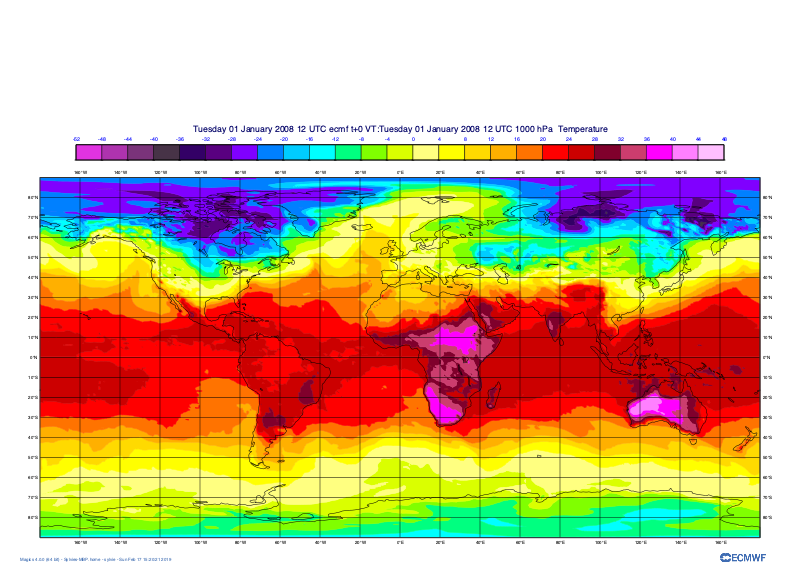

In [11]:
from Magics import macro as magics


data = magics.mgrib(grib_input_file_name = grib)

contour = magics.mcont(contour_automatic_setting = 'ecmwf', 
                       legend= True)

legend = magics.mlegend(legend_display_type = 'continuous')
title = magics.mtext()

coastlines = magics.mcoast(map_coastline_grid_colour='grey', 
                           coasline_grid_line_style='dash')

magics.plot(data, contour, coastlines, legend, title)
